# Дипломный проект

## "Исследование рынка недвижимости в пригородах Бостона (поиск инсайтов, составление рекомендаций стейкхолдерам, построение модели)".

#### Автор: Купаева Г.А.
#### Программа обучения: "Аналитик данных"
#### Группа DA -19

#### 2021 год

#### 

Имеется база стоимости жилья в пригородах Бостона

Количество экземпляров: 506

Количество атрибутов: 13 непрерывных атрибутов (включая атрибут «класс»
«MEDV»), 1 атрибут с двоичным значением.

#### Описание данных
* CRIM - Уровень преступности на душу населения по городам
* ZN - Доля жилой земли, зонированной для участков более 25 000 кв. Футов.
* INDUS - Процент нежилых земель на город
* CHAS - Фиктивная переменная реки Чарльз (1, если участок ограничивает реку; 0 в противном случае)
* NOX - Концентрация оксидов азота NOX (частей на 10 миллионов)
* RM - Среднее количество комнат на одно жилище
* AGE - Доля единиц, занимаемых владельцами, построенных до 1940 г.
* DIS - Pасстояние до пяти бостонских центров занятости
* RAD - Индекс доступности радиальных автомобильных дорог RAD
* TAX - Полная ставка налога на имущество за 10 000 долларов США.
* PTRATIO - соотношение учеников и учителей по городам
* B - 1000 (Bk - 0,63) ^ 2, где Bk - доля людей афроамериканского происхождения по городам.
* LSTAT - % домовладельцев в этом районе являются людьми с низким доходом
* MEDV - Средняя стоимость частных домов в 1000 долларов

Отсутствующие значения атрибутов: Нет.

#### План работы:
1. Обзор данных. Предварительный анализ данных
2. Обработка данных
3. Добавление параметров в таблицу
4. Исследование. Анализ данных
5. Исключения выбросов
6. Закономерности
7. Модели машинного обучения
8. Вывод


#### Бизнес-задача
##### 1. Определение рыночной стоимости жилого дома, в зависимости от вводимых параметров
**Стейкхолтеры:**
 * Банки при принятии дома в залог
 * Риэлторы при продаже/продаже недвижимости 
   
 
**Проблемы:**  
в датасете отсутствуют многие параметры, которые необходимы для определения рыночной стоимости дома:  
   * площадь дома
   * количество спален, сан.узлов
   * этажность
   * наличие улучшений (террасы, бассейн и т.п.)


В виду того, что база учебная, решать бизнес-задачу будем на имеющихся данных.
    


### 1.Обзор данных. Предварительный анализ данных

In [3]:
import pandas as pd # пакет для работы с таблицами
import numpy as np # пакет для работы с математическими данными
import scipy.stats as stats #пакет для работы со статистикой
import matplotlib.pyplot as plt # Библиотека для визуализации результатов
import seaborn as sns # Библиотека для визуализации результатов

In [4]:
import xgboost as xgb

In [5]:
#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 13,6

In [6]:
# Загружаем данные, выводим информацию о df, количество пропущенных значений,
# и статистические данные
housing = pd.read_csv('data.csv')
print('=====================================')
print('Информация по базе данных:')
housing.info()

print('=====================================')
display(housing.head())

print('=====================================')
print('Пропущенные значения:')
print(housing.isna().sum())

print('=====================================')
print('Статистические данные:')
display(housing.describe())

Информация по базе данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 511 entries, 0 to 510
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     511 non-null    float64
 1   ZN       511 non-null    float64
 2   INDUS    511 non-null    float64
 3   CHAS     511 non-null    int64  
 4   NOX      511 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      511 non-null    float64
 7   DIS      511 non-null    float64
 8   RAD      511 non-null    int64  
 9   TAX      511 non-null    int64  
 10  PTRATIO  511 non-null    float64
 11  B        511 non-null    float64
 12  LSTAT    511 non-null    float64
 13  MEDV     511 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 56.0 KB


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


Пропущенные значения:
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         5
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64
Статистические данные:


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,511.000000,511.000000,511.000000,511.000000,511.000000,506.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000
mean,3.584139,11.252446,11.151096,0.068493,0.554757,6.287589,68.616243,3.783876,9.485323,407.440313,18.500000,356.600900,12.879550,22.682192
std,8.564433,23.234838,6.828175,0.252838,0.115310,0.703802,28.099130,2.098631,8.688469,167.903532,2.200348,90.882679,7.797416,9.484262
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082325,0.000000,5.190000,0.000000,0.449000,5.885500,45.050000,2.100350,4.000000,279.500000,17.400000,374.710000,7.065000,17.050000
50%,0.261690,0.000000,9.690000,0.000000,0.538000,6.209000,77.300000,3.152300,5.000000,330.000000,19.100000,391.340000,11.450000,21.200000
75%,3.621175,12.500000,18.100000,0.000000,0.624000,6.629750,94.050000,5.118000,24.000000,666.000000,20.200000,396.210000,17.105000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,23.000000,396.900000,76.000000,67.000000


#### ВЫВОД:
Датасет состоит из 511 строк и 14 колонок.
База учебная, поэтому почти все колонки заполнены. 


##### Проблемы к датасету
* В колонке RM не заполнено 5 строк

##### Проблемы с качеством информации
* Представленные данные отражают устаревшую информацию (данные собраны в 1978 году). Поэтому делаем допущение в рамках данного проекта, что принимаемый датасет актуален для текущего времени, и выводы, полученные в результате изучения данного датасета также актуальны. 

### 2. Обработка данных

Улучшаем качество данных, а именно заполняем пустые строки датасета

In [7]:
# По параметру RM (среднее количество комнат) имеются пустые строки.
# Посмотрим по данному параметру среднее значение и медиану 
# для дальнейшего понимания искажения данных

housing['RM'].describe()

count    506.000000
mean       6.287589
std        0.703802
min        3.561000
25%        5.885500
50%        6.209000
75%        6.629750
max        8.780000
Name: RM, dtype: float64

In [8]:
# Проведем замену средним значением количества комнат, предварительно сгруппировав данные по TAX
# Группируем по TAX так как данный параметр относится к дискретным величинам, ставка налога зависит от стоимости дома, 
# чем больше комнат в доме, тем выше его стоимость

print(housing.groupby(['TAX'])['RM'].mean())
housing['RM'].fillna(housing.groupby(['TAX'])['RM'].transform('mean'), inplace=True)


TAX
187    6.728000
188    5.881286
193    6.774375
198    7.923000
216    7.269800
         ...   
432    6.078000
437    6.006643
469    5.888000
666    6.022152
711    5.585400
Name: RM, Length: 67, dtype: float64


In [9]:
housing['RM'].describe()

count    511.000000
mean       6.286613
std        0.701277
min        3.561000
25%        5.886333
50%        6.209000
75%        6.629500
max        8.780000
Name: RM, dtype: float64

Статистические данные практически не изменились, то есть для дальнейшего использования проведенная замена подходит.

### 3. Построение модели линейной регрессии (Модель №1)

Построим модель линейной регрессии на исходных данных.
Сделаем копию исходного датасета housing

In [10]:
# Делаем копию DF
df_hous1 = housing.copy()
df_hous1

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
506,0.98765,0.0,12.50,0,0.561,6.980,89.0,2.0980,3,320,23.0,396.00,12.00,12.0
507,0.23456,0.0,12.50,0,0.561,6.980,76.0,2.6540,3,320,23.0,343.00,25.00,32.0
508,0.44433,0.0,12.50,0,0.561,6.123,98.0,2.9870,3,320,23.0,343.00,21.00,54.0
509,0.77763,0.0,12.70,0,0.561,6.222,34.0,2.5430,3,329,23.0,343.00,76.00,67.0


Text(0.5, 1.0, 'Тепловая карта')

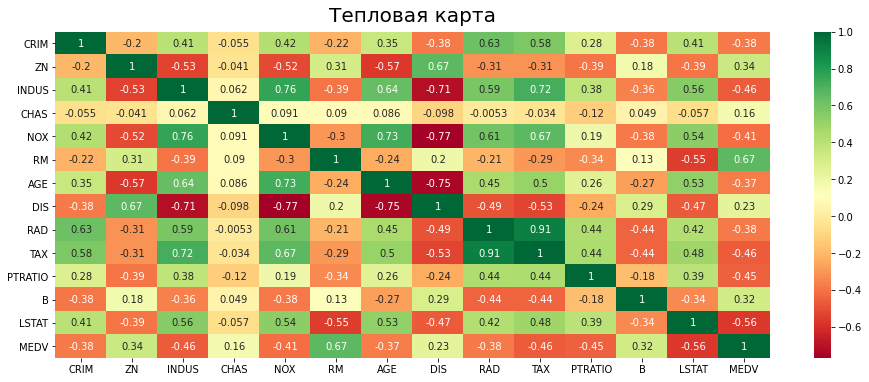

In [11]:
# Увеличиваем размер карты
plt.figure(figsize= (16,6)) 
# Задаем тепловую карту. Для отображения значений параметру annot присваиваем True. Цвет определяем параметром  cmap
housmap = sns.heatmap(df_hous1.corr(), annot=True, cmap='RdYlGn')
# Задаем тепловой карте название. fontdict={'fontsize':20} - размер шрифта, pad=10 - расстояние между заголовком и картой
housmap.set_title('Тепловая карта', fontdict={'fontsize':20}, pad=10 )

Для построения модели посмотрим наибольшие коэффициенты корреляции.
Видно, что стоимость зависит от следующих параметров: CRIM, INDUS, RM, TAX, PTRATIO, LSTAT.

In [12]:
# Импортируем функции для разделения данных на данные для обучения и тестирования
from sklearn.model_selection import train_test_split

In [13]:
# Определим признаки, принимаем все признаки, у которых коэффициент корреляции выше 0,45
# Делим данные на выборку для обучения и тестирования
data_x1 = df_hous1[['CRIM','INDUS','TAX', 'PTRATIO','LSTAT']]
data_y1 = df_hous1['MEDV']
x_train, x_test, y_train, y_test = train_test_split(data_x1, data_y1, test_size=0.25) 

In [14]:
# Смотрим сколько элементов будет в тестовой выборке
len(y_test)

128

In [15]:
# Строим модель линейной регрессии
# импортируем функционал линейной регрессии
from sklearn.linear_model import LinearRegression

In [16]:
# обучаем модель
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [17]:
# Если мы оставляем параметр RM, то выходит ошибка "значение, слишком большое для dtype ('float64')"

Оценим качество выборки

In [18]:
# расчет точности
r_train = model.score(x_train, y_train)
r_test = model.score(x_test, y_test)
print('Качество модели на тестовых данных:', r_test, '\nКачество модели на тренировочных данных:', r_train)

Качество модели на тестовых данных: 0.3734391689216974 
Качество модели на тренировочных данных: 0.4127867596202164


In [19]:
# Оценим качество выборки с помощью метрик MSE и RMCE 
from sklearn.metrics import mean_squared_error
# И с помощью метрики R2
from sklearn.metrics import r2_score

In [20]:
y_pred = model.predict(x_test)
print('==============Тестовая выборка===================')
print('Mean Squared Error (MSE):', round(mean_squared_error(y_test, y_pred),2))
print('Root Mean Squared Error (RMSE):', round(mean_squared_error(y_test, y_pred, squared=False),2))
print('R2 score:', round(r2_score(y_test, y_pred),3))
print()
# Посчитаем среднюю стоимость домовладений на обучающей выборке и на тестовой
print('========Разница между фактом и прогнозом========')
mean_pred = round(sum(y_pred)/len(y_test),2)
mean_test = round(sum(y_test)/len(y_test),2)
print('Средняя стоимость домовладения, прогноз: ', mean_pred)
print('Средняя стоимость домовладения, факт:', mean_test)
print('Разница между прогнозом и фактом:', round(abs(100*(mean_pred - mean_test)/mean_test),3),'%')


==============Тестовая выборка===================
Mean Squared Error (MSE): 58.36
Root Mean Squared Error (RMSE): 7.64
R2 score: 0.373

========Разница между фактом и прогнозом========
Средняя стоимость домовладения, прогноз:  22.7
Средняя стоимость домовладения, факт: 22.94
Разница между прогнозом и фактом: 1.046 %


**Вывод:**
Как видно, качество выборки очень низкое. Кроме того, параметр RM имеет слишком большое значени и модель линеной регрессии не строится.



### 4. Добавление параметров в таблицу

Добавим столбец, который будет отражать **среднюю стоимость дома**, в зависимости от количества комнат.

Сделаем копию исходного датафрейма

In [21]:
df_hous_2 = housing.copy()

In [22]:
# Для добавления данных в новый столбец, напишем функцию:
# принимает значение по каждой строке в столбцах MEDV и RM, и находит среднюю 
# стоимость дома в зависимости от количества комнат
def price_h(row):
    price = row['MEDV']/row['RM']
    return price


In [23]:
df_hous_2['price_House'] = df_hous_2.apply(price_h, axis = 1)
df_hous_2

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,price_House
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,3.650190
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,3.363962
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,4.829506
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,4.772792
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,5.065062
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
506,0.98765,0.0,12.50,0,0.561,6.980,89.0,2.0980,3,320,23.0,396.00,12.00,12.0,1.719198
507,0.23456,0.0,12.50,0,0.561,6.980,76.0,2.6540,3,320,23.0,343.00,25.00,32.0,4.584527
508,0.44433,0.0,12.50,0,0.561,6.123,98.0,2.9870,3,320,23.0,343.00,21.00,54.0,8.819206
509,0.77763,0.0,12.70,0,0.561,6.222,34.0,2.5430,3,329,23.0,343.00,76.00,67.0,10.768242


Добавим столбец, который будет отражать **налоговую ставку**, в зависимости от количества комнат.

In [24]:
# Для добавления данных в новый столбец, напишем функцию:
# принимает значение по каждой строке в столбцах TAX и RM, и находит значение налоговой ставки
# в зависимости от количества комнат
def tax_r(row):
    price = row['TAX']/row['RM']
    return price

In [25]:
df_hous_2['tax_room'] = df_hous_2.apply(tax_r, axis = 1)
df_hous_2

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,price_House,tax_room
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,3.650190,45.019011
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,3.363962,37.688834
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,4.829506,33.681280
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,4.772792,31.723350
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,5.065062,31.061984
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
506,0.98765,0.0,12.50,0,0.561,6.980,89.0,2.0980,3,320,23.0,396.00,12.00,12.0,1.719198,45.845272
507,0.23456,0.0,12.50,0,0.561,6.980,76.0,2.6540,3,320,23.0,343.00,25.00,32.0,4.584527,45.845272
508,0.44433,0.0,12.50,0,0.561,6.123,98.0,2.9870,3,320,23.0,343.00,21.00,54.0,8.819206,52.261963
509,0.77763,0.0,12.70,0,0.561,6.222,34.0,2.5430,3,329,23.0,343.00,76.00,67.0,10.768242,52.876888


### 5. Исследование. Анализ данных

Построим гистограммы для общей картины

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7eff167489d0>,
      dtype=object)

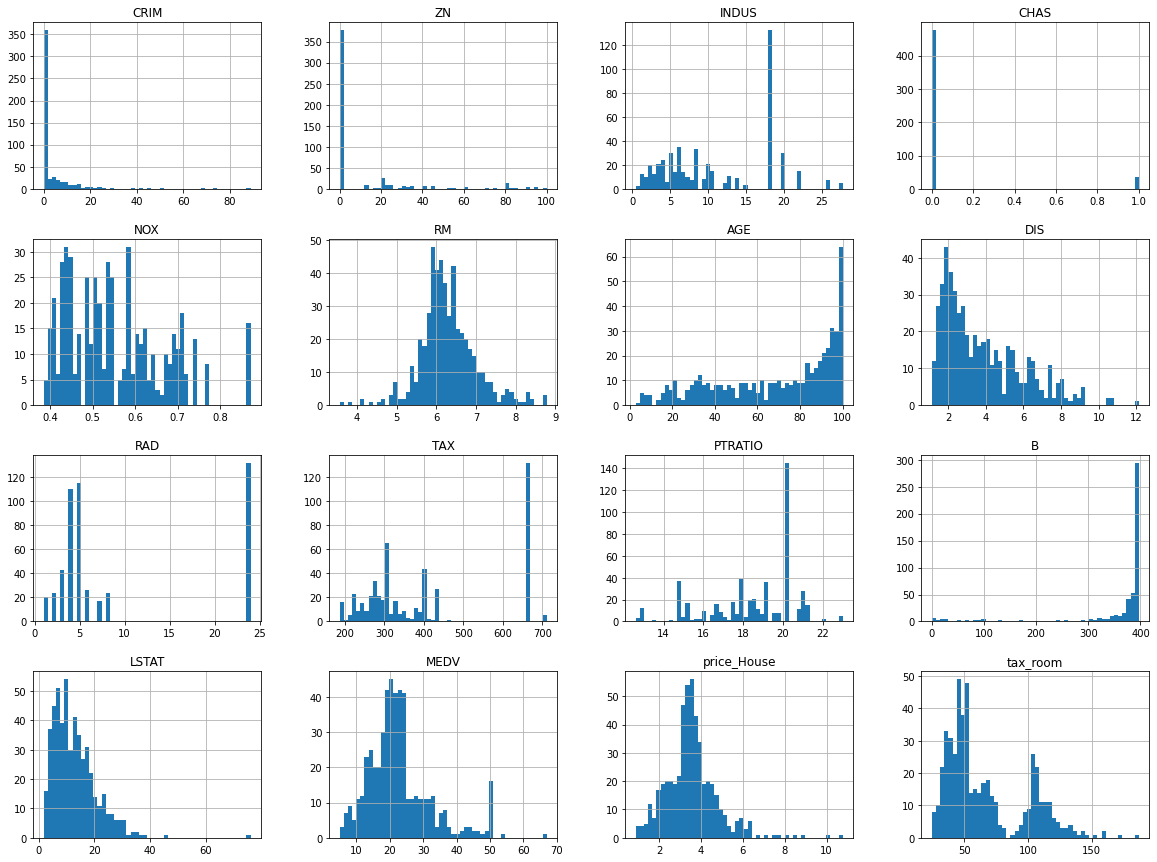

In [26]:
# Построим гистограммы для определения выборки нормально распределены данные или нет
%matplotlib inline
import matplotlib.pyplot as plt
df_hous_2.hist(bins=50,figsize=(20,15))

Проанализируем следующие столбцы поподробнее:

In [27]:
# Напишем функцию, которая позволит анализировать данные в разрезе discribe колонки df[param],
# строит гистограмму с заголовком.
def histogram_param(df, param, title):
    dis = df[param].describe()
    display(dis)
    print('Межквартальный размах: от {:.2}'.format(dis['25%']), 'до {:.2}'.format(dis['75%']))
    df[param].plot(kind ='hist',
                   grid = True,
                   title = title,
                   bins = 20,
                   legend = True)
#     plt.show()

##### MEDV (Среднее стоимость домовладений)

count    511.000000
mean      22.682192
std        9.484262
min        5.000000
25%       17.050000
50%       21.200000
75%       25.000000
max       67.000000
Name: MEDV, dtype: float64

Межквартальный размах: от 1.7e+01 до 2.5e+01


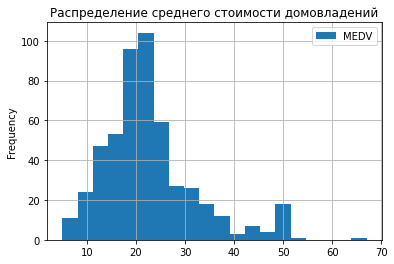

In [28]:
histogram_param(df_hous_2, 'MEDV', 'Распределение среднего стоимости домовладений')

Распределение почти нормальное. Имеется несколько выбросов, а именно стоимость домов в размере 50 тыс.дол.
Построим boxplot для наглядного представления выбросов

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


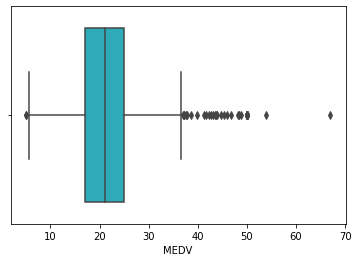

In [29]:
sns.boxplot(df_hous_2['MEDV'], palette = ['#17becf'])

##### RM (Среднее количество комнат)

count    511.000000
mean       6.286613
std        0.701277
min        3.561000
25%        5.886333
50%        6.209000
75%        6.629500
max        8.780000
Name: RM, dtype: float64

Межквартальный размах: от 5.9 до 6.6


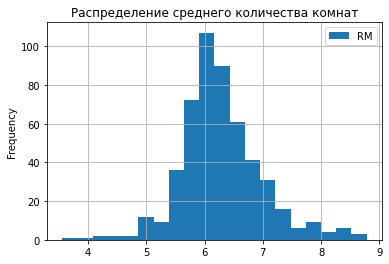

In [30]:
histogram_param(df_hous_2, 'RM', 'Распределение среднего количества комнат')

В среднем дома имеют по 6 комнат. Большинство объектов - это дома с 4 - 8 комнатами.
Распределение близко к нормальному

##### AGE (доля домов построенных до 1940 г)

count    511.000000
mean      68.616243
std       28.099130
min        2.900000
25%       45.050000
50%       77.300000
75%       94.050000
max      100.000000
Name: AGE, dtype: float64

Межквартальный размах: от 4.5e+01 до 9.4e+01


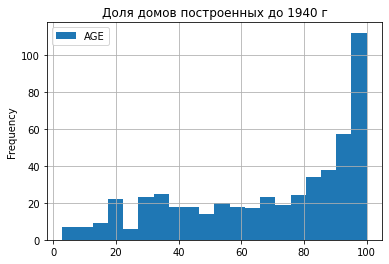

In [31]:
histogram_param(df_hous_2, 'AGE', 'Доля домов построенных до 1940 г')

##### LSTAT (% Ниже статуса населения)

count    511.000000
mean      12.879550
std        7.797416
min        1.730000
25%        7.065000
50%       11.450000
75%       17.105000
max       76.000000
Name: LSTAT, dtype: float64

Межквартальный размах: от 7.1 до 1.7e+01


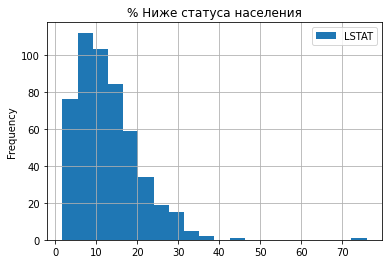

In [32]:
histogram_param(df_hous_2, 'LSTAT', '% Ниже статуса населения')

В среднем процент населения с низким статусом населения составляет 12,88. 
В большей части населенных пунктов низкий статус населения составляет от 1,73% до 30%.
Имеются населенные пункты, где низкий уровень составляет 76%.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


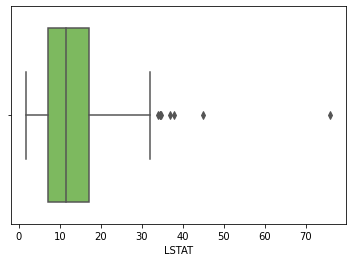

In [33]:
# Построим boxplot для наглядного представления выбросов
sns.boxplot(df_hous_2['LSTAT'], palette=['#78C850'])

##### price_House (Средняя стоимость дома за комнату)

count    511.000000
mean       3.549981
std        1.238820
min        0.879817
25%        2.867260
50%        3.474114
75%        4.046842
max       10.768242
Name: price_House, dtype: float64

Межквартальный размах: от 2.9 до 4.0


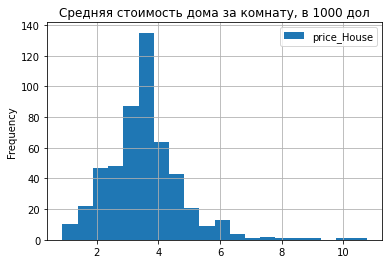

In [34]:
histogram_param(df_hous_2, 'price_House', 'Средняя стоимость дома за комнату, в 1000 дол')

Средняя стоимость дома (за комнату) составляет 3,47 тыс.дол. Большинство домов стоят от 1,5 до 5 тыс.дол за комнату.
При этом имеются стоимостью до 10,77 тыс.дол. Данный выброс говорит или о том, что неверно занесены данные или дом имеет улучшения (бассейн, ремонт, расположение в престижной части района населенного пункта), которые не отражены в анализируемом датасете.

### 6. Исключение выбросов
* Стоимость домов выше 50 тыс.дол
* Районы, где процент населения с низким уровнем дохода выше 70%

In [35]:
# Удаляем строки с выбросами. Оставляем только те строки,
# по которым выбросы незначительные.
# Если мы убираем все выбросы по колонкам "Стоимость" и "Статус", то 
# датафрейм уменьшается в 2 раза. В данной ситуации это неприемлемо. Датасет небольшой.
df_filter = df_hous_2.query('(MEDV < 50) and (LSTAT <= 70)')
print('Количество объектов в базе до исключения выбивающихся значений:', len(df_hous_2))
print('Количество объектов в базе после исключения выбивающихся значений:', len(df_filter))

Количество объектов в базе до исключения выбивающихся значений: 511
Количество объектов в базе после исключения выбивающихся значений: 493


### 7.  Зависимости

In [36]:
# Используем функцию, которая будет считать значение корреляции и строить график.
def cor_graph (df, param, param1, title, color):
    cor_g = df[param].corr(df[param1])
    print('Коэффициент Пирсона: ', round(cor_g, 2))
    sns.regplot(data=housing, x= param, y= param1, color= color)
    plt.title(title)


Коэффициент Пирсона:  -0.73


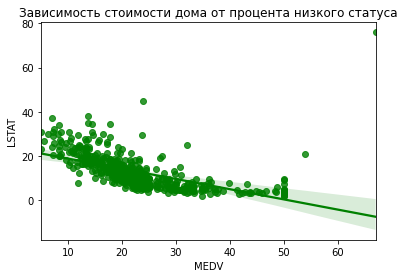

In [37]:
cor_graph(df_filter, 'MEDV', 'LSTAT', 'Зависимость стоимости дома от процента низкого статуса', 'g' )

Обратная зависимость стоимости дома от статуса населения - высокая.
То есть, чем ниже процент населения с низким статусом, тем выше стоимость домовладений. 
Что в принципе закономерно, люди с высоким статусом покупают дорогое жилье.

Коэффициент Пирсона:  -0.45


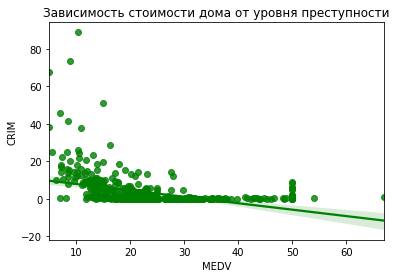

In [38]:
cor_graph(df_filter, 'MEDV', 'CRIM', 'Зависимость стоимости дома от уровня преступности', 'g' )

Слабая обратно пропорциональная зависимость, то есть уровень преступности влияет на стоимость домов, но в незначительной степени. 

Коэффициент Пирсона:  -0.51


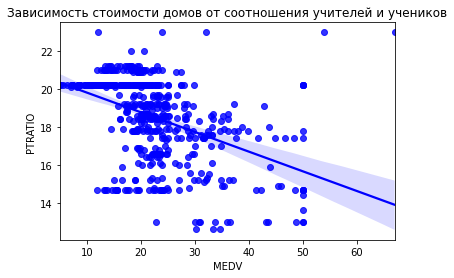

In [39]:
cor_graph(df_filter, 'MEDV', 'PTRATIO', 'Зависимость стоимости домов от соотношения учителей и учеников', 'b' )

Данная зависимость носит более выраженный характер, чем выше соотношение учителей и учеников, тем ниже стоимость жилья. То есть в населенном пункте больше располагается учебных заведений (колледжи, школы). У учителей доход не высокий, что сказывается на покупательской способности. 

In [40]:
df_filter.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,price_House,tax_room
CRIM,1.000000,-0.197827,0.407384,-0.063643,0.420191,-0.219804,0.352752,-0.380403,0.627711,0.584086,0.278689,-0.384080,0.446613,-0.448915,-0.483934,0.589664
ZN,-0.197827,1.000000,-0.527310,-0.053119,-0.511932,0.304593,-0.563375,0.673717,-0.304761,-0.301063,-0.382611,0.176009,-0.417950,0.402560,0.365722,-0.324717
INDUS,0.407384,-0.527310,1.000000,0.035470,0.765112,-0.411520,0.637869,-0.710122,0.594024,0.716450,0.385165,-0.363279,0.624619,-0.597698,-0.568491,0.722164
CHAS,-0.063643,-0.053119,0.035470,1.000000,0.085514,0.043751,0.070645,-0.076692,-0.031581,-0.066959,-0.118434,0.041726,-0.009371,0.074337,0.078374,-0.072847
NOX,0.420191,-0.511932,0.765112,0.085514,1.000000,-0.321841,0.727318,-0.767424,0.610847,0.666741,0.186575,-0.382956,0.599011,-0.522625,-0.519906,0.667097
RM,-0.219804,0.304593,-0.411520,0.043751,-0.321841,1.000000,-0.265841,0.236579,-0.199461,-0.283475,-0.276043,0.117907,-0.585063,0.683297,0.433680,-0.503344
AGE,0.352752,-0.563375,0.637869,0.070645,0.727318,-0.265841,1.000000,-0.743212,0.449417,0.497979,0.268781,-0.278118,0.623085,-0.492067,-0.506588,0.508144
DIS,-0.380403,0.673717,-0.710122,-0.076692,-0.767424,0.236579,-0.743212,1.000000,-0.487751,-0.529257,-0.250752,0.298708,-0.528785,0.367444,0.364640,-0.536617
RAD,0.627711,-0.304761,0.594024,-0.031581,0.610847,-0.199461,0.449417,-0.487751,1.000000,0.908973,0.439573,-0.450477,0.488509,-0.474468,-0.498881,0.863098
TAX,0.584086,-0.301063,0.716450,-0.066959,0.666741,-0.283475,0.497979,-0.529257,0.908973,1.000000,0.439803,-0.447766,0.548019,-0.570431,-0.585009,0.958114


Text(0.5, 1.0, 'Тепловая карта')

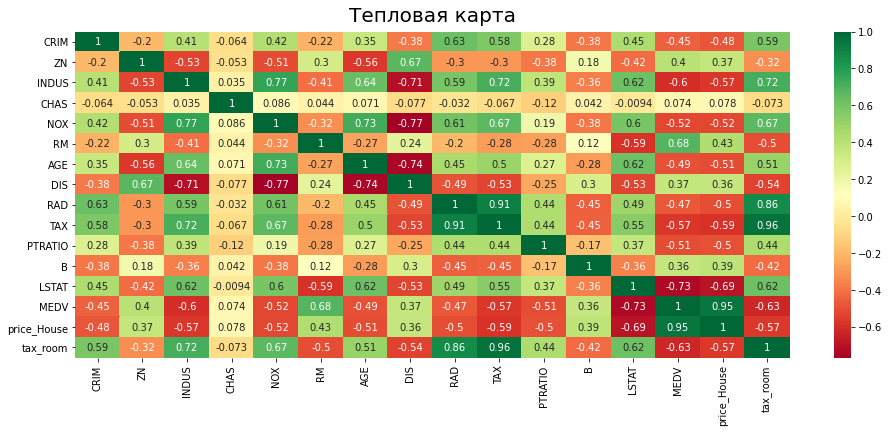

In [41]:
# sns.set()
# Увеличиваем размер карты
plt.figure(figsize= (16,6)) 
# Задаем тепловую карту. Для отображения значений параметру annot присваиваем True. Цвет определяем параметром  cmap
housmap = sns.heatmap(df_filter.corr(), annot=True, cmap='RdYlGn')
# Задаем тепловой карте название. fontdict={'fontsize':20} - размер шрифта, pad=10 - расстояние между заголовком и картой
housmap.set_title('Тепловая карта', fontdict={'fontsize':20}, pad=10 )

Рассматривая всю базу можно выделить насколько закономерностей: наибольшее влияние на стоимость домовладений оказывают количество комнат (что закономерно), статус населения. В меньшей степени соотношение учителей и учеников, налоговая ставка.  Причем, чем налоговая ставка ниже, тем стоимость домов выше.

Наиболее интересные закономерности наблюдаются по параметру "Статус населения". Процент населения с более низким статусом наблюдается в населенных пунктах:
* с более низкими показателями азота
* с меньшим процентом старых домов
* с менее низкими налоговыми ставками
* в домовладениях, где большое количество комнат 


Вполне возможно, что:
1. более новые домовладения строятся дальше от центральной части Бостона.
2. соответственно чем дальше от Бостана, тем чище воздух, соответственно показатели азота ниже.
3. стоимость земли ниже, значит можно строить более большие дома, с большим количеством комнат.
4. уровень дохода в более удаленных населенных пунктах от центральной части как правило ниже. 

Все это и оказывает влияние на процент населения с низким статусом. 

### 8. Построим модель, которая будет определять стоимость дома

1. Определим признаки, по которым будет рассчитываться стоимость.
2. Разделим выборку на обучающую и тестовую.
3. Определим качество модели

После удаления выбросов увеличилось количество параметров, которые значительным образом влияют на стоимость домовладения.
Определим их значимость.

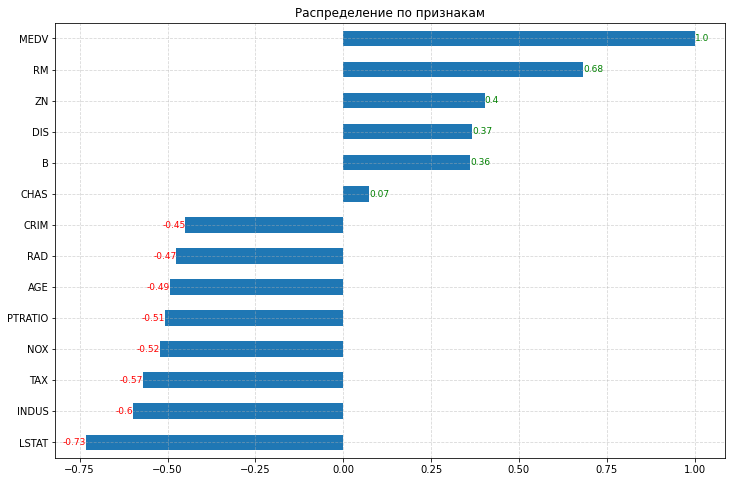

In [42]:
plt.figure(figsize=(12,8)) #, dpi= 80)
A = df_filter[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT','MEDV']].corr().sort_values('MEDV')
A['MEDV'].plot(kind='barh', 
               title='Распределение по признакам')
plt.grid(linestyle='--', alpha=0.5)
for x, y in enumerate(A['MEDV']):
    t = plt.text(y, x, round(y, 2),horizontalalignment='right' if y < 0 else 'left', 
                 verticalalignment='center', fontdict={'color':'red' if y < 0 else 'green', 'size':9})

Видим, что практически все зависимости, влияющие на стоимость (от 0,45 - слабая; от 05 до 0,7 - средняя; от 0,7 - высокая) - обратно-пропорциональные. Исключением является параметр RM.
Построим модели с разным количеством параметров:

1. Берем все параметры, у которых коэффициент корреляции выше 0,45
2. Берем только те параметры, у которых коэффициент корреляции 0,5 и выше.

#### 8.1. Модель линейной регрессии, с параметрами, у которых коэффициент корреляции 0,45 и выше (Модель №2)

In [43]:
# Для начала принимаем все признаки, у которых коэффициент корреляции выше 0,45
data_X2 = df_filter[['CRIM', 'INDUS', 'NOX', 'RM', 'AGE', 'RAD', 'TAX', 'PTRATIO', 'LSTAT']]
data_X2

,CRIM,INDUS,NOX,RM,AGE,RAD,TAX,PTRATIO,LSTAT
0,0.00632,2.31,0.538,6.575,65.2,1,296,15.3,4.98
1,0.02731,7.07,0.469,6.421,78.9,2,242,17.8,9.14
2,0.02729,7.07,0.469,7.185,61.1,2,242,17.8,4.03
3,0.03237,2.18,0.458,6.998,45.8,3,222,18.7,2.94
4,0.06905,2.18,0.458,7.147,54.2,3,222,18.7,5.33
...,...,...,...,...,...,...,...,...,...
504,0.10959,11.93,0.573,6.794,89.3,1,273,21.0,6.48
505,0.04741,11.93,0.573,6.030,80.8,1,273,21.0,7.88
506,0.98765,12.50,0.561,6.980,89.0,3,320,23.0,12.00
507,0.23456,12.50,0.561,6.980,76.0,3,320,23.0,25.00


In [44]:
data_Y2 = df_filter['MEDV']
data_Y2

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
504    22.0
505    11.9
506    12.0
507    32.0
510    24.0
Name: MEDV, Length: 493, dtype: float64

In [45]:
# Делим данные на выборку для обучения и тестирования
# Функции для разделения данных на данные для обучения и тестирования
from sklearn.model_selection import train_test_split
x2_train, x2_test, y2_train, y2_test = train_test_split(data_X2, data_Y2, test_size=0.25)

In [46]:
len(y2_test)

124

In [47]:
# Строим модель линейной регрессии
# импортируем функционал линейной регрессии
from sklearn.linear_model import LinearRegression

In [48]:
# обучаем модель
model2 = LinearRegression()
model2.fit(x2_train, y2_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [49]:
y2_pred = model2.predict(x2_test)
y2_pred

array([18.58475441, 28.07778145, 15.91547661, 14.72091815, 24.49612386,
       22.55925777, 22.57305959, 13.42779428, 16.19525742, 24.2689296 ,
       27.10525975, 22.03221271, 28.6688875 , 20.97690014, 22.44441844,
       13.858299  , 24.56916308, 18.0388557 , 23.20106895, 23.87279625,
       17.39041795, 26.7000768 , 17.58680502, 19.27282818, 31.40075672,
       26.91307484, 24.18643435, 33.68815176, 18.63963502, 16.19816403,
       14.56163379, 25.9347647 , 21.80677024, 24.9163784 , 31.07140206,
       16.75891579, 23.62211798, 29.97748072, 24.75961258, 31.31644926,
       18.82463032, 16.79041879, 20.11958878, 22.7975718 , 28.0826181 ,
        4.08890658, 11.62284265, 31.75410413, 24.2228903 , 23.13129179,
       18.93528892, 22.05604558, 26.47676044, 20.1257179 , 16.32963343,
       15.87963618, 21.73619775, 15.16525421, 18.12414254, 31.14343418,
       27.14935256, 38.23041947, 29.37619795, 31.2689484 , 29.39288126,
       22.12126378, 17.54455168,  4.90373126, 27.74115613, 15.28

In [50]:
# Оценим качество
r2_train = model2.score(x2_train, y2_train)
r2_test = model2.score(x2_test, y2_test)
print('Качество модели на тестовых данных:', r2_test, '\nКачество модели на тренировочных данных:', r2_train)

Качество модели на тестовых данных: 0.7256542675870093 
Качество модели на тренировочных данных: 0.7243243570303693


In [51]:
# Функция, которая определяет процент улучшения данных
def percent(a0_test, b0_train, a1_test, b1_train):
    print('Разница модели на тестовых данных:', round((a1_test - a0_test)/a0_test*100,2),'%')
    print('Разница модели на тренировочных данных:', round((b1_train - b0_train)/b0_train*100,2), '%')
    

In [52]:
# Посмотрим насколько лучше стало качество модели на очищенных данных по сравнению с исходной
print('r_test = ', r_test)
print('r_train = ', r_train)
print('r2_test = ', r2_test)
print('r2_train = ', r2_train)
percent( r_test, r_train, r2_test, r2_train)

r_test =  0.3734391689216974
r_train =  0.4127867596202164
r2_test =  0.7256542675870093
r2_train =  0.7243243570303693
Разница модели на тестовых данных: 94.32 %
Разница модели на тренировочных данных: 75.47 %


Качество модели на очищенных данных стало гораздо лучше.

In [53]:
res2_df = x2_test.copy()

res2_df['y2_pred'] = y2_pred
res2_df['y2_test'] = y2_test
res2_df

,CRIM,INDUS,NOX,RM,AGE,RAD,TAX,PTRATIO,LSTAT,y2_pred,y2_test
17,0.78420,8.14,0.538,5.990,81.7,4,307,21.0,14.67,18.584754,17.5
175,0.06664,4.05,0.510,6.546,33.1,5,296,16.6,5.33,28.077781,29.4
356,8.98296,18.10,0.770,6.212,97.4,24,666,20.2,17.60,15.915477,17.8
378,23.64820,18.10,0.671,6.380,96.2,24,666,20.2,23.69,14.720918,13.1
94,0.04294,15.04,0.464,6.249,77.3,4,270,18.2,10.59,24.496124,20.6
...,...,...,...,...,...,...,...,...,...,...,...
206,0.22969,10.59,0.489,6.326,52.5,4,277,18.6,10.97,24.415147,24.4
172,0.13914,4.05,0.510,5.572,88.5,5,296,16.6,14.69,20.283321,23.1
367,13.52220,18.10,0.631,3.863,100.0,24,666,20.2,13.33,5.778069,23.1
265,0.76162,3.97,0.647,5.560,62.8,5,264,13.0,10.45,23.832284,22.8


In [54]:
# Оценим качество выборки с помощью метрик MSE и RMCE 
from sklearn.metrics import mean_squared_error
# И с помощью метрики R2
from sklearn.metrics import r2_score

In [55]:
# Проверим качество выборки
y2_pred = model2.predict(x2_test)
print('==============Тестовая выборка===================')
print('Mean Squared Error (MSE):', round(mean_squared_error(y2_test, y2_pred),2))
print('Root Mean Squared Error (RMSE):', round(mean_squared_error(y2_test, y2_pred, squared=False),2))
print('R2 score:', round(r2_score(y2_test, y2_pred),3))

# Посчитаем среднюю стоимость домовладений фактрическую и прогнозную
print('========Разница между фактом и прогнозом========')
mean2_pred = round(sum(y2_pred)/len(y2_test),2)
mean2_test = round(sum(y2_test)/len(y2_test),2)
print('Средняя стоимость домовладения, прогноз: ', mean2_pred)
print('Средняя стоимость домовладения, факт:', mean2_test)
print('Разница между прогнозом и фактом:', round(abs(100*(mean2_pred - mean2_test)/mean2_test),3),'%')

==============Тестовая выборка===================
Mean Squared Error (MSE): 16.76
Root Mean Squared Error (RMSE): 4.09
R2 score: 0.726
========Разница между фактом и прогнозом========
Средняя стоимость домовладения, прогноз:  22.14
Средняя стоимость домовладения, факт: 21.89
Разница между прогнозом и фактом: 1.142 %


**Вывод:** Модель линейной регрессии на очищенных данных стала гораздо лучше, но недостаточно.

Посмотрим как поведет себя модель, при параметрах, у которых среднее влияние (коэффициент корреляции 0,5 и выше) на стоимость домовладения.

#### 8.2. Модель линейной регрессии, с параметрами, у которых коэффициент корреляции 0,5 и выше (Модель №3)

In [56]:
# Для начала принимаем все признаки, у которых коэффициент корреляции выше 0,5
data_X3 = df_filter[['INDUS', 'NOX', 'RM', 'TAX', 'PTRATIO', 'LSTAT']]
data_Y3 = df_filter['MEDV']

In [57]:
# Делим данные на выборку для обучения и тестирования
x3_train, x3_test, y3_train, y3_test = train_test_split(data_X3, data_Y3, test_size=0.25)

In [58]:
# обучаем модель
model3 = LinearRegression()
model3.fit(x3_train, y3_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [59]:
y3_pred = model3.predict(x3_test)

In [60]:
# Оценим качество
r3_train = model3.score(x3_train, y3_train)
r3_test = model3.score(x3_test, y3_test)
print('Качество модели на тестовых данных:', r3_test, '\nКачество модели на тренировочных данных:', r3_train)

Качество модели на тестовых данных: 0.6078476753490989 
Качество модели на тренировочных данных: 0.7416681585782416


In [61]:
# Посмотрим насколько лучше стало качество модели 
print('==============Качество по отношению к исходной модели==================')
print('r_test = ', r_test)
print('r_train = ', r_train)
print('r3_test = ', r3_test)
print('r3_train = ', r3_train)

percent( r_test, r_train, r3_test, r3_train)
print()
print('==============Качество по отношению к модели 2 =================')
percent( r2_test, r2_train, r3_test, r3_train)

==============Качество по отношению к исходной модели==================
r_test =  0.3734391689216974
r_train =  0.4127867596202164
r3_test =  0.6078476753490989
r3_train =  0.7416681585782416
Разница модели на тестовых данных: 62.77 %
Разница модели на тренировочных данных: 79.67 %

==============Качество по отношению к модели 2 =================
Разница модели на тестовых данных: -16.23 %
Разница модели на тренировочных данных: 2.39 %


Нельзя сказать, что качество модели стало лучше

In [62]:
# Проверим качество выборки с помощью метрик MSE, RMCE, R2
y3_pred = model3.predict(x3_test)
print('==============Тестовая выборка===================')
print('Mean Squared Error (MSE):', round(mean_squared_error(y3_test, y3_pred),2))
print('Root Mean Squared Error (RMSE):', round(mean_squared_error(y3_test, y3_pred, squared=False),2))
print('R2 score:', round(r2_score(y3_test, y3_pred),3))
print()

# Посчитаем среднюю стоимость домовладений фактическую и прогнозную
print('========Разница между фактом и прогнозом========')
mean3_pred = round(sum(y3_pred)/len(y3_test),2)
mean3_test = round(sum(y3_test)/len(y3_test),2)
print('Средняя стоимость домовладения, прогноз: ', mean3_pred)
print('Средняя стоимость домовладения, факт:', mean3_test)
print('Разница между прогнозом и фактом:', round(abs(100*(mean3_pred - mean3_test)/mean3_test),3),'%')

==============Тестовая выборка===================
Mean Squared Error (MSE): 20.84
Root Mean Squared Error (RMSE): 4.57
R2 score: 0.608

========Разница между фактом и прогнозом========
Средняя стоимость домовладения, прогноз:  22.02
Средняя стоимость домовладения, факт: 22.33
Разница между прогнозом и фактом: 1.388 %


**Вывод:** при удаление параметров "преступность", "возраст домов", "категория дорог" качество модели стало хуже.

Построим еще модель.

При этом используем то же набор параметров, что и для модели №3

#### 8.3. XGBRegressor (Модель 4)

In [63]:
import xgboost as xgb

In [64]:
# Для начала принимаем все признаки, у которых коэффициент корреляции выше 0,5
data_X4 = df_filter[['INDUS', 'NOX', 'RM', 'TAX', 'PTRATIO', 'LSTAT']]
data_Y4 = df_filter['MEDV']

In [65]:
# Делим данные на выборку для обучения и тестирования
# Функции для разделения данных на данные для обучения и тестирования
from sklearn.model_selection import train_test_split
x4_train, x4_test, y4_train, y4_test = train_test_split(data_X4, data_Y4, test_size=0.25)

In [66]:
# Обучаем модель
model4 = xgb.XGBRegressor(verbosity=0) 
model4

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=0)

In [67]:
model4.fit(x4_train, y4_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=0)

In [68]:
# Оценим качество
r4_train = model4.score(x4_train, y4_train)
r4_test = model4.score(x4_test, y4_test)
print('Качество модели на тестовых данных:', r4_test, '\nКачество модели на тренировочных данных:', r4_train)

Качество модели на тестовых данных: 0.7919579407487902 
Качество модели на тренировочных данных: 0.950974798984626


In [69]:
# Посмотрим насколько лучше стало качество модели 
print('==============Качество по отношению к модели 3 ==================')
print('r3_test = ', r3_test)
print('r3_train = ', r3_train)
print('r4_test = ', r4_test)
print('r4_train = ', r4_train)
print()
percent( r3_test, r3_train, r4_test, r4_train)


==============Качество по отношению к модели 3 ==================
r3_test =  0.6078476753490989
r3_train =  0.7416681585782416
r4_test =  0.7919579407487902
r4_train =  0.950974798984626

Разница модели на тестовых данных: 30.29 %
Разница модели на тренировочных данных: 28.22 %


На первый взгляд, качество стало лучше.

In [70]:
# Проверим качество выборки с помощью метрик MSE, RMCE, R2
y4_pred = model4.predict(x4_test)
print('==============Тестовая выборка===================')
print('Mean Squared Error (MSE):', round(mean_squared_error(y4_test, y4_pred),2))
print('Root Mean Squared Error (RMSE):', round(mean_squared_error(y4_test, y4_pred, squared=False),2))
print('R2 score:', round(r2_score(y4_test, y4_pred),3))
print()

# Посчитаем среднюю стоимость домовладений фактическую и прогнозную
print('========Разница между фактом и прогнозом========')
mean4_pred = round(sum(y4_pred)/len(y4_test),2)
mean4_test = round(sum(y4_test)/len(y4_test),2)
print('Средняя стоимость домовладения, прогноз: ', mean4_pred)
print('Средняя стоимость домовладения, факт:', mean4_test)
print('Разница между прогнозом и фактом:', round(abs(100*(mean4_pred - mean4_test)/mean4_test),3),'%')

==============Тестовая выборка===================
Mean Squared Error (MSE): 12.79
Root Mean Squared Error (RMSE): 3.58
R2 score: 0.792

========Разница между фактом и прогнозом========
Средняя стоимость домовладения, прогноз:  21.93
Средняя стоимость домовладения, факт: 20.7
Разница между прогнозом и фактом: 5.942 %


Качество модели №4 по отношению к моделям №2,3, согласно метрик, действительно лучше. 

Попробуем сравнить не средние величины, а суммы.

In [71]:
# Посчитаем общую стоимость домовладений фактическую и прогнозную у моделей №3 и №4
print('========Разница между фактом и прогнозом========')
print('Общая стоимость домовладения (Модель №2), прогноз: ', sum(y2_pred))
print('Общая стоимость домовладения (Модель №2), факт:', sum(y2_test))
print('Разница между прогнозом и фактом (Модель №2):', round(abs(100*(sum(y2_pred) - sum(y2_test))/sum(y2_test)),3),'%')
print()
print('Общая стоимость домовладения (Модель №3), прогноз: ', sum(y3_pred))
print('Общая стоимость домовладения (Модель №3), факт:', sum(y3_test))
print('Разница между прогнозом и фактом (Модель №3):', round(abs(100*(sum(y3_pred) - sum(y3_test))/sum(y3_test)),3),'%')
print()
print('Общая стоимость домовладения (Модель №4), прогноз: ', sum(y4_pred))
print('Общая стоимость домовладения (Модель №4), факт:', sum(y4_test))
print('Разница между прогнозом и фактом (Модель №4):', round(abs(100*(sum(y4_pred) - sum(y4_test))/sum(y4_test)),3),'%')

========Разница между фактом и прогнозом========
Общая стоимость домовладения (Модель №2), прогноз:  2744.9371475998464
Общая стоимость домовладения (Модель №2), факт: 2714.7000000000003
Разница между прогнозом и фактом (Модель №2): 1.114 %

Общая стоимость домовладения (Модель №3), прогноз:  2730.8418397551986
Общая стоимость домовладения (Модель №3), факт: 2768.5000000000014
Разница между прогнозом и фактом (Модель №3): 1.36 %

Общая стоимость домовладения (Модель №4), прогноз:  2719.784818172455
Общая стоимость домовладения (Модель №4), факт: 2566.7000000000007
Разница между прогнозом и фактом (Модель №4): 5.964 %


Полученные данные показывают, что модель №4 не точнее моделей №2,3.


Визуализируем исходные и прогнозируемые тестовые данные на графиках для визуального сравнения.

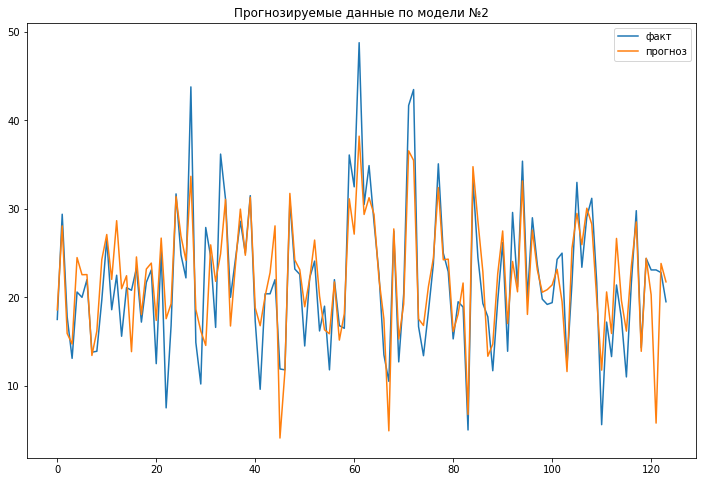

In [72]:
plt.figure(figsize=(12,8))
x2_ax = range(len(y2_test))
plt.plot(x2_ax, y2_test, label="факт")
plt.plot(x2_ax, y2_pred, label="прогноз")
plt.title("Прогнозируемые данные по модели №2")
plt.legend()
plt.show()

На графике видно достаточно сильное искажение прогнозных и фактических данных.

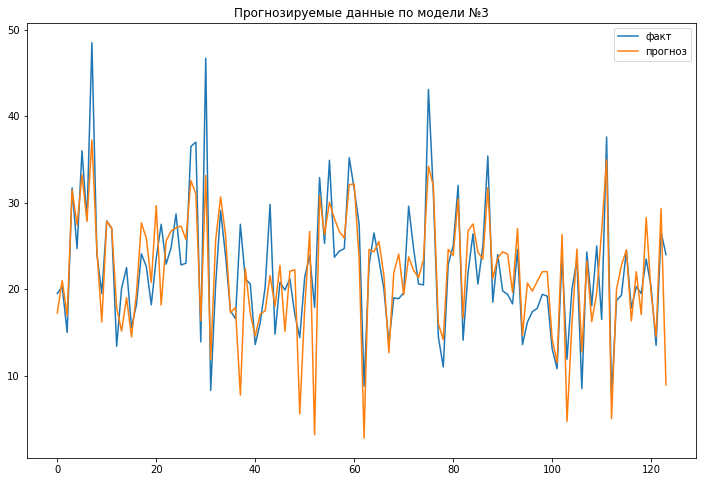

In [73]:
plt.figure(figsize=(12,8))
x3_ax = range(len(y3_test))
plt.plot(x3_ax, y3_test, label="факт")
plt.plot(x3_ax, y3_pred, label="прогноз")
plt.title("Прогнозируемые данные по модели №3")
plt.legend()
plt.show()

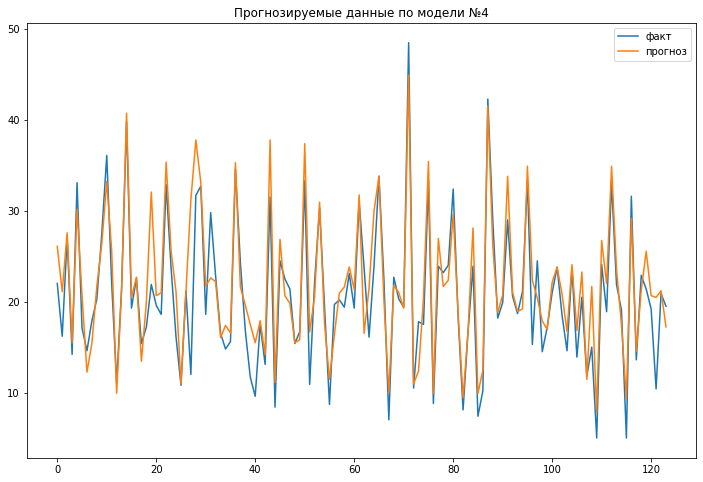

In [74]:
plt.figure(figsize=(12,8))
x4_ax = range(len(y4_test))
plt.plot(x4_ax, y4_test, label="факт")
plt.plot(x4_ax, y4_pred, label="прогноз")
plt.title("Прогнозируемые данные по модели №4")
plt.legend()
plt.show()

Визуальное представление показывает, что прогнозные данные, полученные по модели №4 более четко ложатся на фактические, по сравнению с результатами, полученными по моделям №2,3

#### 8.4. Расчет стоимости домовладения

В результате проведенного анализа, принимаем для расчета стоимости домовладения модель №4.

In [75]:
#  Спрогнозируем стоимость дома для клиента

realtor = pd.DataFrame(data = {'INDUS': 0.46, 'NOX': 0.87, 'RM': 3, 'TAX': 330, 'PTRATIO': 23, 'LSTAT': 17.1}, index = [0])
# price = model4.predict(realtor)
print("Прогнозируемая цена дома: {:,.2f} тыс.дол".format(model4.predict(realtor)[0]))


Прогнозируемая цена дома: 20.73 тыс.дол


### 9. Дополнительные исследования 

#### 9.1 Стоимость дома в зависимости от расположения относительно реки

**Попробуем определить, имеется ли явная зависимость стоимости домовладения от его расположения относительно реки**

Разделим таблицу на 2 датасета в зависимости от расположения относительно реки. 

Сделаем копию отфильтрованного датасета df_filter и разделим его на 2 таблицы: около реки и далеко от реки

In [76]:
df_char = df_filter.copy()

In [77]:
river = df_char['CHAS'] == 1
river

0      False
1      False
2      False
3      False
4      False
       ...  
504    False
505    False
506    False
507    False
510    False
Name: CHAS, Length: 493, dtype: bool

In [78]:
df_1, df_0 = df_char[river], df_char[~river]
df_1.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,price_House,tax_room
count,29.000000,29.000000,29.000000,29.0,29.00000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000
mean,1.412575,6.206897,12.086207,1.0,0.59410,6.362483,76.265517,3.181497,8.379310,362.655172,17.537931,371.243793,12.741034,23.979310,3.734099,57.797616
std,2.110431,13.205462,5.611499,0.0,0.15429,0.794051,20.745142,1.089352,7.403734,151.051145,1.837586,58.180794,6.294671,7.024161,0.792155,24.489628
min,0.045600,0.000000,3.330000,1.0,0.44290,5.012000,27.600000,1.321600,3.000000,216.000000,14.700000,88.010000,3.010000,13.400000,2.480104,28.253761
25%,0.114250,0.000000,6.410000,1.0,0.48900,5.920000,59.100000,2.122200,4.000000,276.000000,16.400000,377.070000,8.050000,20.000000,3.393276,44.166307
50%,0.407710,0.000000,10.590000,1.0,0.50700,6.164000,83.400000,3.272100,5.000000,307.000000,17.600000,390.940000,13.270000,22.400000,3.704913,46.875000
75%,1.413850,0.000000,18.100000,1.0,0.77000,6.758000,92.100000,3.917500,8.000000,403.000000,18.600000,393.740000,16.030000,27.000000,4.023747,65.752978
max,8.982960,40.000000,19.580000,1.0,0.87100,8.780000,100.000000,5.211900,24.000000,666.000000,20.200000,396.900000,26.820000,46.000000,6.017005,114.768223


In [79]:
df_0.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,price_House,tax_room
count,464.000000,464.000000,464.000000,464.0,464.000000,464.000000,464.000000,464.000000,464.000000,464.000000,464.000000,464.000000,464.000000,464.000000,464.000000,464.000000
mean,3.763047,11.346983,11.061940,0.0,0.551864,6.241074,67.838362,3.867219,9.543103,410.321121,18.610345,354.877371,13.028621,21.496121,3.398298,67.422899
std,8.933811,23.235211,6.869593,0.0,0.113297,0.644180,28.436681,2.147884,8.755515,168.404514,2.135765,94.068843,7.288248,7.901531,1.018623,31.423894
min,0.006320,0.000000,0.740000,0.0,0.385000,3.561000,2.900000,1.137000,1.000000,187.000000,12.600000,0.320000,1.980000,5.000000,0.879817,24.855119
25%,0.080050,0.000000,5.130000,0.0,0.448000,5.879750,42.550000,2.110500,4.000000,284.000000,17.400000,375.085000,7.362500,16.475000,2.798477,44.473983
50%,0.240075,0.000000,9.125000,0.0,0.538000,6.189000,76.250000,3.267450,5.000000,332.000000,19.100000,391.985000,11.675000,20.650000,3.430733,53.858803
75%,3.694070,12.500000,18.100000,0.0,0.624000,6.576000,94.100000,5.315650,24.000000,666.000000,20.200000,396.900000,17.152500,24.525000,3.908751,98.670322
max,88.976200,100.000000,27.740000,0.0,0.871000,8.398000,100.000000,12.126500,24.000000,711.000000,23.000000,396.900000,45.000000,48.800000,7.722550,187.026116


Text(0.5, 1.0, 'Домовладения, ограниченные рекой')

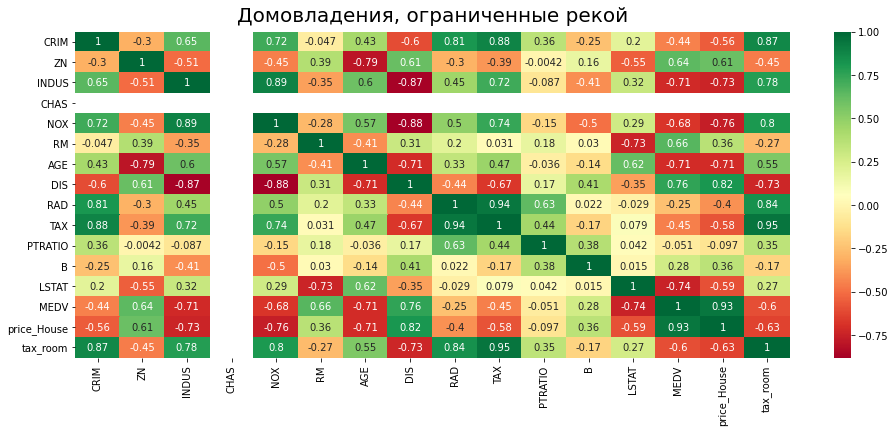

In [80]:
# сделаем тепловую карту для домовладений, ограниченных рекой
plt.figure(figsize= (16,6)) 
# Задаем тепловую карту. Для отображения значений параметру annot присваиваем True. Цвет определяем параметром  cmap
A = sns.heatmap(df_1.corr(), annot=True, cmap='RdYlGn')
# Задаем тепловой карте название. fontdict={'fontsize':20} - размер шрифта, pad=10 - расстояние между заголовком и картой
A.set_title('Домовладения, ограниченные рекой', fontdict={'fontsize':20}, pad=10 )

Text(0.5, 1.0, 'Домовладения, НЕ ограниченные рекой')

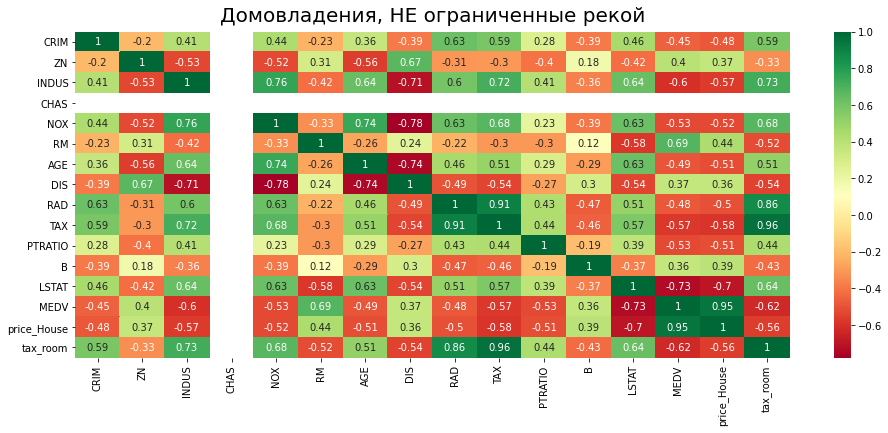

In [81]:
# сделаем тепловую карту для домовладений, НЕ ограниченных рекой
plt.figure(figsize= (16,6)) 
# Задаем тепловую карту. Для отображения значений параметру annot присваиваем True. Цвет определяем параметром  cmap
B = sns.heatmap(df_0.corr(), annot=True, cmap='RdYlGn')
# Задаем тепловой карте название. fontdict={'fontsize':20} - размер шрифта, pad=10 - расстояние между заголовком и картой
B.set_title('Домовладения, НЕ ограниченные рекой', fontdict={'fontsize':20}, pad=10 )

Посмотрим, какие наиболее значимые параметры в каждом случае.

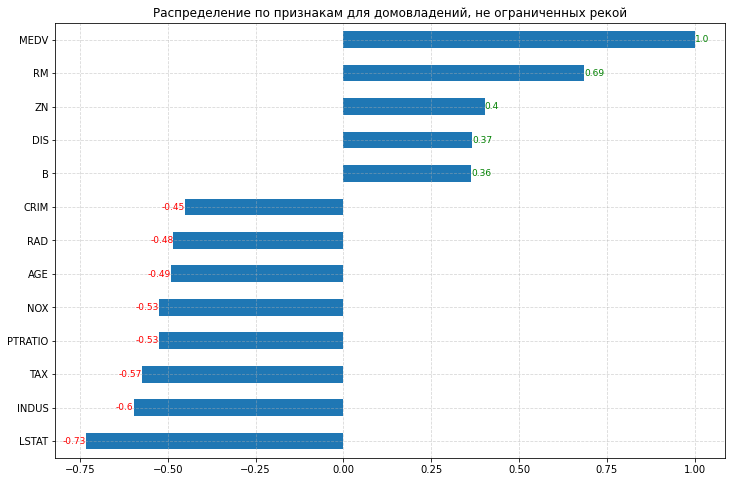

In [82]:
plt.figure(figsize=(12,8)) #, dpi= 80)
B = df_0[['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT','MEDV']].corr().sort_values('MEDV')
B['MEDV'].plot(kind='barh', 
               title='Распределение по признакам для домовладений, не ограниченных рекой')
plt.grid(linestyle='--', alpha=0.5)
for x, y in enumerate(B['MEDV']):
    t = plt.text(y, x, round(y, 2),horizontalalignment='right' if y < 0 else 'left', 
                 verticalalignment='center', fontdict={'color':'red' if y < 0 else 'green', 'size':9})



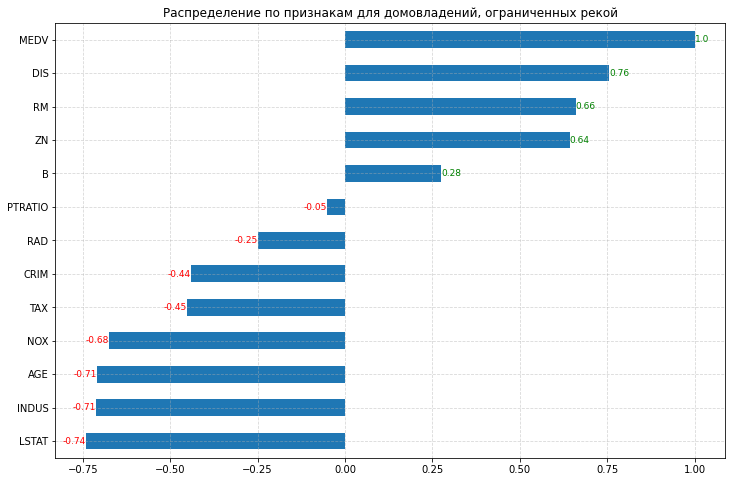

In [83]:
plt.figure(figsize=(12,8)) #, dpi= 80)|
C = df_1[['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT','MEDV']].corr().sort_values('MEDV')
C['MEDV'].plot(kind='barh', 
               title='Распределение по признакам для домовладений, ограниченных рекой')
plt.grid(linestyle='--', alpha=0.5)
for x, y in enumerate(C['MEDV']):
    t = plt.text(y, x, round(y, 2), horizontalalignment='right' if y < 0 else 'left', 
                 verticalalignment='center', fontdict={'color':'red' if y < 0 else 'green', 'size':9})

**Вывод**


Рассматривая данные по домам, которые ограничены рекой и не ограничены можно увиделить изменение закономерностей. На стоимость домовладений, ограниченных рекой, наибольшее влияние оказывается:
* количество комнат (что закономерно),
* статус населения, 
* доля земли под домовладением, 
* возраст дома (чем новее дом, тем дороже), 
* наличие оксидов азота (чем меньше, тем стоимость домовладени выше), 
* расстояние до центров занятости
* налоговая ставка

При этом  для домовладений, не ограниченных рекой добавился параметр, влияющий на стоимость:
* соотношение учителей и учеников

А также можно исключить параметры, которые влияют в слабой степени:
* доля земли под домовладением, 
* расстояние до центров занятости

Возможно это говорит о том, что часть людей готовы платить именно за расположение домовладения около реки.

**Посмотрим как распределена стоимость, в зависимости от категории дороги**

In [84]:
# Посмотрим как распределяется стоимость домов, в зависимости от категории дороги. Используем сводные таблицы

In [85]:
price_chas = pd.pivot_table(df_filter, 
                            index='CHAS', 
                            columns='RAD', 
                            values='MEDV', 
                            aggfunc=('mean'))

display(price_chas)
print()
print('Средняя стоимость домовладей, ограниченных рекой: {:,.2f} тыс.дол'.format(sum(df_1['MEDV'])/len(df_1['MEDV'])))
print('Средняя стоимость домовладей, не ограниченных рекой: {:,.2f} тыс.дол'.format(sum(df_0['MEDV'])/len(df_0['MEDV'])))

RAD,1,2,3,4,5,6,7,8,24
CHAS,,,,,,,,,
0,23.015789,26.833333,26.931579,20.4610,24.542000,20.976923,27.105882,30.477778,14.872131
1,NaN,NaN,27.950000,25.8125,22.455556,NaN,NaN,26.000000,20.180000



Средняя стоимость домовладей, ограниченных рекой: 23.98 тыс.дол
Средняя стоимость домовладей, не ограниченных рекой: 21.50 тыс.дол


Видно, что средняя стоимость домовладений, ограниченных рекой, выше, чем стоимость домовладений, расположенных на удалении от реки.

